In [1]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.


In [3]:
#gitignore
import requests
import os 
from pathlib import Path
import pandas as pd
import requests
def urlname(year, qtr):
    url = f'https://www.sec.gov/Archives/edgar/full-index/{year}/QTR{qtr}/company.idx'
    return url
    
def address2save(year, qtr):
    address = f"/Users/pedrovallocci/Documents/PhD (local)/Research/By Topic/Measuring knowledge capital risk/input/company/{year}Q{qtr}.idx"
    return address

def createfile(filename, content):
        name= filename + ".txt"  # Here we define the name of the file
        with open(name, "w") as file:
                file.write(str(content)) # Here we define its content, which will be the textual content from the 10-K files.
                file.close()
                print(f"Success! We're in {year}Q{qtr}. Iteration {a_index}. Firm {company_names[a_index]}. ")

In [4]:
import os
import requests
import random
import time

yearrange = list(range(2000, 2023))
qtrrange = [1, 2, 3, 4]

for year in yearrange:
    for qtr in qtrrange:
        wait_time = random.uniform(5, 15)
        time.sleep(wait_time)
        print(f"Time's up! Time to retrieve {year}Q{qtr}")
        thisURL = urlname(year, qtr)
        response = requests.get(thisURL, headers={'User-Agent': 'Mozilla/5.0'})

        filename = address2save(year, qtr)
        if not os.path.isfile(filename):
            # File doesn't exist, create it
            with open(filename, "wb") as file:
                file.write(response.content)
        else:
            # File exists, overwrite content
            with open(filename, "w") as file:
                file.write(response.content.decode())
                
                


Time's up! Time to retrieve 2000Q1
Time's up! Time to retrieve 2000Q2
Time's up! Time to retrieve 2000Q3
Time's up! Time to retrieve 2000Q4
Time's up! Time to retrieve 2001Q1
Time's up! Time to retrieve 2001Q2
Time's up! Time to retrieve 2001Q3
Time's up! Time to retrieve 2001Q4
Time's up! Time to retrieve 2002Q1
Time's up! Time to retrieve 2002Q2
Time's up! Time to retrieve 2002Q3
Time's up! Time to retrieve 2002Q4
Time's up! Time to retrieve 2003Q1
Time's up! Time to retrieve 2003Q2
Time's up! Time to retrieve 2003Q3
Time's up! Time to retrieve 2003Q4
Time's up! Time to retrieve 2004Q1
Time's up! Time to retrieve 2004Q2
Time's up! Time to retrieve 2004Q3
Time's up! Time to retrieve 2004Q4
Time's up! Time to retrieve 2005Q1
Time's up! Time to retrieve 2005Q2
Time's up! Time to retrieve 2005Q3
Time's up! Time to retrieve 2005Q4
Time's up! Time to retrieve 2006Q1
Time's up! Time to retrieve 2006Q2
Time's up! Time to retrieve 2006Q3
Time's up! Time to retrieve 2006Q4
Time's up! Time to r

In [4]:
yearrange = list(range(2005, 2023, 1))
qtrrange = [1,2,3,4]
download_10ks = False
for year in yearrange:
    for qtr in qtrrange:
        parent_dir = os.path.dirname(os.getcwd())
        filename = f'/Users/pedrovallocci/Documents/PhD (local)/Research/By Topic/Measuring knowledge capital risk/input/company/{year}Q{qtr}.idx'
        with open(filename, 'r', encoding='utf-8', errors='replace') as file:
            index_file = file.readlines()
        find_list = []
        item = 0
        line = 0

        while True:
            i = index_file[line]
            loc1 = i.find('10-K')
            loc2 = i.find("NT 10-K") 
            loc3 = i.find("10-K/A")

        #We strictly keep 10-K files, not NT 10-K or 10-K/A
            if (loc1 != -1) and (loc2 == -1)  and (loc3 == -1):
                find_list.append(i)
            line+=1
            item = len(find_list)
            if line >= len(index_file):
                break
        filenames = []
        sec_filenames = []
        company_names = []
        cik = []
        for line in find_list:
            split_i = line.split()
            cik.append(split_i[-3])
            filenames.append(split_i[-3] + "_" + split_i[-2]+ ".txt")
            sec_filenames.append("https://www.sec.gov/Archives/" + line.split()[-1])
            company_names.append(line.split('10-K')[0].strip())

        df = pd.DataFrame({'company': company_names, 'filename': filenames, 'sec_filename': sec_filenames, 'cik': cik})
        df.to_csv(f'/Users/pedrovallocci/Documents/PhD (local)/Research/By Topic/Measuring knowledge capital risk/output/firmdict/{year}Q{qtr}.csv')
        
        if download_10ks:
            folder_name = f"/Users/pedrovallocci/Documents/PhD (local)/Research/By Topic/Measuring knowledge capital risk/output/10-K files/{year}/Q{qtr}/"
            Path(folder_name).mkdir(parents=True, exist_ok=True)
            ReportList = []
            Company_No = []

            for i in find_list:
                split_i = i.split()
                ReportList.append("https://www.sec.gov/Archives/" + split_i[-1])
                Company_No.append(split_i[-3] + "_" + split_i[-2])

            os.chdir(folder_name)
            company_order = 0
            unable_request = 0

            for a_index in range(len(ReportList)):
                web_add = ReportList[a_index]
                filename = Company_No[a_index]

                webpage_response = requests.get(web_add, headers={'User-Agent': 'Mozilla/5.0'}) 
                # It is very important to use the header, otherwise the SEC will block the requests after the first 5.

                if webpage_response.status_code == 200: 
                    # The HTTP 200 OK success status response code indicates that the request has succeeded. 
                    body = webpage_response.content
                    createfile(filename, body)
                else:
                    print ("Unable to get response with Code : %d " % (webpage_response.status_code))
                    unable_request += 1

                a_index +=1

            print(unable_request)

In [91]:
%pip install html5lib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 2.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [148]:
from bs4 import BeautifulSoup
import re, pandas as pd
# Regex to find <DOCUMENT> tags
file = open("/Users/pedrovallocci/Documents/PhD (local)/Research/By Topic/Measuring knowledge capital risk/output/10-K files/2022/1895567_2022-03-30.txt", "r")
raw_10k = file.read()
doc_start_pattern = re.compile(r'<SEC-DOCUMENT>')
doc_end_pattern = re.compile(r'</SEC-DOCUMENT>')
# Regex to find <TYPE> tag prceeding any characters, terminating at new line
type_pattern = re.compile(r'<TYPE>[^\n]+')

doc_start_is = [x.end() for x in doc_start_pattern.finditer(raw_10k)]
doc_end_is = [x.start() for x in doc_end_pattern.finditer(raw_10k)]


### Type filter is interesting, it looks for <TYPE> with Not flag as new line, ie terminare there, with + sign
### to look for any char afterwards until new line \n. This will give us <TYPE> followed Section Name like '10-K'
### Once we have have this, it returns String Array, below line will with find content after <TYPE> ie, '10-K' 
### as section names
doc_types = [x[len('<TYPE>'):] for x in type_pattern.findall(raw_10k)]

document = {}
doc_start = doc_start_is[0]
doc_end = doc_end_is[0]
document['10-K'] = raw_10k[doc_start:doc_end]
# Create a loop to go through each section type and save only the 10-K section in the dictionary
# for doc_type, doc_start, doc_end in zip(doc_types, doc_start_is, doc_end_is):
#     if doc_type == '10-K':
#         document[doc_type] = raw_10k[doc_start:doc_end]   

In [160]:
# Write the regex
regex = re.compile(r'(>Item(\s|&#160;|&nbsp;)(1A|1B|7A|7|8)\.{0,1})|(ITEM\s(1A|1B|7A|7|8))')

# Use finditer to math the regex
matches = regex.finditer(document['10-K'])

test_df = pd.DataFrame([(x.group(), x.start(), x.end()) for x in matches])

test_df.columns = ['item', 'start', 'end']
test_df['item'] = test_df.item.str.lower()

# Display the dataframe

test_df.replace('&#160;',' ',regex=True,inplace=True)
test_df.replace('&nbsp;',' ',regex=True,inplace=True)
test_df.replace(' ','',regex=True,inplace=True)
test_df.replace('\.','',regex=True,inplace=True)
test_df.replace('>','',regex=True,inplace=True)

pos_dat = test_df.sort_values('start', ascending=True).drop_duplicates(subset=['item'], keep='last')

pos_dat.set_index('item', inplace=True)

# Get Item 1a
item_1a_raw = document['10-K'][pos_dat['start'].loc['item1a']:pos_dat['start'].loc['item1b']]

# Get Item 7
item_7_raw = document['10-K'][pos_dat['start'].loc['item7']:pos_dat['start'].loc['item7a']]

# Get Item 7a
item_7a_raw = document['10-K'][pos_dat['start'].loc['item7a']:pos_dat['start'].loc['item8']]

item_1a_raw[0:1000]

item_1a_content = BeautifulSoup(item_1a_raw,  "html.parser")

item_1a_content.get_text()

'ITEM 1A.RISK FACTORSOur operations and financial results are subject to various risks and uncertainties, including but not limited to those described below, which could harm our business, reputation, financial condition, and operating results, and affect the trading price of our Class A and Class C stock.Risks Specific to our CompanyWe generate a significant portion of our revenues from advertising, and reduced spending by advertisers, a loss of partners, or new and existing technologies that block ads online and/or affect our ability to customize ads could harm our business. We generated more than 80% of total revenues from the display of ads online in 2021. Many of our advertisers, companies that distribute our products and services, digital publishers, and content providers can terminate their contracts with us at any time. These partners may not continue to do business with us if we do not create more value (such as increased numbers of users or customers, new sales leads, increas

In [54]:
from sec_api import ExtractorApi

extractorApi = ExtractorApi("228ef531e3ecf5403354a79b5b4ead4d0379cd16a4951f4fcdcc0993874598bb")

filing_url = "https://www.sec.gov/Archives/edgar/data/1318605/000156459021004599/tsla-10k_20201231.htm"

# get the standardized and cleaned text of section 1A "Risk Factors"
section_text = extractorApi.get_section(filing_url, "1A", "text")
section_text[0:1000]

' ITEM 1A. RISK FACTORS\n\nYou should carefully consider the risks described below together with the other information set forth in this report, which could materially affect our business, financial condition and future results. The risks described below are not the only risks facing our company. Risks and uncertainties not currently known to us or that we currently deem to be immaterial also may materially adversely affect our business, financial condition and operating results. \n\nRisks Related to Our Ability to Grow Our Business\n\nWe may be impacted by macroeconomic conditions resulting from the global COVID-19 pandemic.\n\nSince the first quarter of 2020, there has been a worldwide impact from the COVID-19 pandemic. Government regulations and shifting social behaviors have limited or closed non-essential transportation, government functions, business activities and person-to-person interactions. In some cases, the relaxation of such trends has recently been followed by actual or 

In [1]:
import os
import random
import re
import string
from bs4 import BeautifulSoup
import pandas as pd 
from nltk.tokenize import word_tokenize

LM_negw = pd.read_csv("/Users/pedrovallocci/Documents/PhD (local)/Research/By Topic/Measuring knowledge capital risk/input/LM_negativewords.csv")

def read_txt(file_name):
	txt_file = open(file_name,"r",encoding='UTF8') 
	# txt_file = open(file_name,"r", encoding='windows-1252')                                       
	str_txt = txt_file.read()
	return str_txt

def textual_content(file):
	doc_start_list = [x.start() for x in text_start_pattern.finditer(file)] #assigns the first index from the starting pattern created before
	doc_end_list = [x.end() for x in text_end_pattern.finditer(file)] #assigns the last index from the ending pattern created before
	type_list = [x[len('<TYPE>'):] for x in type_pattern.findall(file)] #assigns the type of the documents, which will always be 10-K's because we restricted it before	
	for doc_type, start_index, end_index in zip(type_list, doc_start_list, doc_end_list):
			report_content = file[start_index:end_index]
	return report_content

def BeautifulSoup_clean1(str_txt):
	soup = BeautifulSoup(str_txt,'html.parser')
	return soup.get_text() # Here we return only the textual content, without the XML tags

def further_clean(text):
	
	# First, for each of the following characters (or symbols), the function replaces it by an empty space on the text 
	for a_sign in ['\\n', '\\t', '☐', '☒', '\xa0', '●', '“', '”']:
		text = text.replace(a_sign," ")
		
	# Here, for each punctution in a set of all existing punctuations, the function also replaces it by an empty space.
	for a_punc in string.punctuation:
		text = text.replace(a_punc, " ")
		
	# Morever, the fuction replaces '\s+' (which represents a sequence of empty spaces) by an single empty space, avoiding unecessary spaces 
	# and also sets all letters to lower case to make it easier to analyse later.
		
	text = re.sub('\s+'," ", text).lower()
	
	return text.strip() 

def word_count(text):
	
	# Tokenizing and counting total words
	word_list = word_tokenize(text) # Splits the text into words and assigns it to a new list
	total_num = len(word_list) # Count the number of words in the new list
	
	
	# Counting negative words
	
	negw_dic_ex = negw_dic.copy() # This commands creates a copy of the dictionary we created with the L&M negative word list
	
	# This loops checks if each word in the text is a negative word, and if so, adds 1 to the respective entry in 
	# the "negw_dic_ex" dictionary.
	
	for a_word in word_list:
		if a_word in LM_negw:
			negw_dic_ex[a_word] += 1
			
			
	# This commands creates a new variable from a dictionary (the negw_dic_ex created before), and the orient="index" means that
	# the keys of the dictionary will be the rows of the variable.
			
	negw_df = pd.DataFrame.from_dict(negw_dic_ex, orient='index')
	negw_df.reset_index(inplace=True) # This command modifies the indexes of the list, converting them to default indexes.
	# This command renames the columns of the variable (inplace=True means that the variable will be modified without creating a new variable)
	negw_df.rename(columns={"index": "Negative_words", 0: "Word_counts"}, inplace=True)
	
	
	total_neg = sum(list(negw_dic_ex.values()))  # Total number of negative words
	negw_fre = total_neg/total_num # % of negative words in the text
	
	return {"Negative_WordCount_df":negw_df, "Total_WordNumber":total_num, "Total_Negative_WordCount": total_neg,
		"Negative_WordFrequency": negw_fre}	

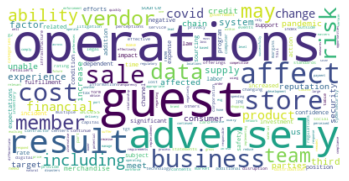

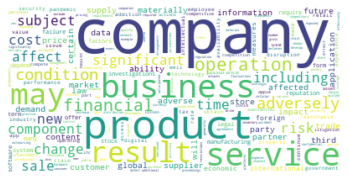

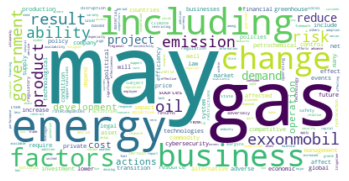

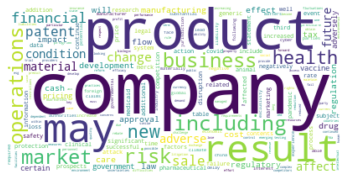

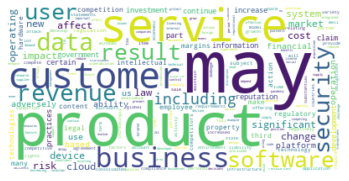

,File_name,Total_WordNumber,Total_Negative_WordCount,Negative_WordFrequency
1,target.txt,4978,238,0.047810
2,apple2.txt,10216,442,0.043265
3,exxon.txt,3959,132,0.033342
4,merck.txt,11050,437,0.039548
5,microsoft2.txt,10270,444,0.043233


In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# First, we create a list with the name of the files in the folder where we downlaoded the 10-K files.
os.chdir("/Users/pedrovallocci/Documents/PhD (local)/Research/By Topic/Measuring knowledge capital risk/input/manual10ks")
all_files = os.listdir()
# Here we basically create a list with 10 random indexes between 0 and 100 to selected the files in the folder.
random_index = []

""" while len(random_index) < 10:
	n = random.randint(0,96)
	if n not in random_index:
		random_index.append(n)
		
# Here we create a new list with the 10 chosen files.
chosen_file = [all_files[i] for i in random_index]
print(chosen_file) """

chosen_file = all_files[1:6]
	
text_start_pattern = re.compile(r'<DOCUMENT>') 
text_end_pattern = re.compile(r'</DOCUMENT>')
type_pattern = re.compile(r'<TYPE>10-K[^\n]+')

# Here we will define a function that will be used to extract the textual data from 10-K txt files.

# text_initial = read_txt(chosen_file[0])
# text_10k = textual_content(text_initial)
# print(text_10k[0:30])
# print(text_10k[-30:])


# Transform the file into a list of negative words, and convert all entries to lowercase.
LM_negw = list(LM_negw['Word'])
LM_negw = [j.lower() for j in LM_negw]

# Since we will be counting negative words, lets create a dictionary that assigns the number of appearances to each negative words

negw_dic = {} #creates an empty dictionary
for A_NegWord in LM_negw:
	negw_dic[A_NegWord] = 0 # For each word in the LM_negw list, we create an entry inside the dictonary with the word and the number 0.
	

# VERY IMPORTANT COMMENT. I WILL REDEFINE THE FUNCTION TO TOKENIZE THE TEXT AND WILL ADD THE STEPS TO COUNT THE NEGATIVE WORDS.
# THIS WAY, THE COMMAND WILL BE MUCH EASIER TO RUN
		# First, we open 4 empty lists to append the 4 returns from the function we've just defined.
Neg_WordDf_list = []
Total_Word_list = []
Total_Neg_Word_list = []
Frequency_list = []
textvector = []
# For each file in the chosen_file list (the list with the 10-K txt files)
for a_file in chosen_file:
	text = read_txt(a_file) #run the read_txt fuction that opens the txt file
	# text1 = textual_content(text) #run the textual_content function to get the textual content from the file opened before.
	#text2 = BeautifulSoup_clean1(text) #run the BeautifulSoup_clean1 function to clean the data even better using the html.parser algorithm. 
	text3 = further_clean(text) #run the further_clean function to remove symbols, punctiations, and convert strings to lower case. 
	result = word_count(text3) #run the word_count functions that tokenize the text, and deal with negative word counting.
	textvector.append(text)
	
	word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text3)
	plt.imshow(word_cloud, interpolation='bilinear')
	plt.axis("off")
	plt.show()

	Neg_WordDf_list.append(result['Negative_WordCount_df'])
	Total_Word_list.append(result["Total_WordNumber"])
	Total_Neg_Word_list.append(result["Total_Negative_WordCount"])
	Frequency_list.append(result["Negative_WordFrequency"])
	
	# Here we create a new dictionary using data from the lists defined before.
summary = {'File_name':chosen_file, 'Total_WordNumber':Total_Word_list, 'Total_Negative_WordCount':Total_Neg_Word_list,'Negative_WordFrequency':Frequency_list}

summary_df = pd.DataFrame(summary, index=range(1,6))
summary_df

In [42]:
!pip install spacy
!python -m spacy download en_core_web_md 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 3.0 MB/s eta 0:00:0000:0100:01m
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
import spacy

nlp = spacy.load("en_core_web_md")  # make sure to use larger package!
doc1 = nlp(textvector[4])
doc2 = nlp(textvector[2])

# Similarity of two documents
print(doc1.similarity(doc2))
# # Similarity of tokens and spans
# french_fries = doc1[2:4]
# burgers = doc1[5]
# print(french_fries, "<->", burgers, french_fries.similarity(burgers))

In [30]:
textvector[0]

"\nItem 1A.    Risk Factors\n\nOur business is subject to many risks. Set forth below are the material risks we face. Risks are listed in the categories where they primarily apply, but other categories may also apply.\n\nCompetitive and Reputational Risks\n\nOur continued success is dependent on positive perceptions of Target which, if eroded, could adversely affect our business and our relationships with our guests and team members.\n\nWe believe that one of the reasons our shareholders, guests, team members, and vendors choose Target is the positive reputation we have built over many years for serving those constituencies and the communities in which we operate. To be successful in the future, we must continue to preserve Target's reputation. Our reputation is based in large part on perceptions, both about us and others with whom we do business, and broad access to social media makes it easy for anyone to provide public feedback that can influence perceptions of Target. It may be dif